In [54]:
#import libraries
import numpy as np
import pandas as pd
import joblib

In [55]:
#loading the data
df=pd.read_csv('diabetes.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [56]:
#check for nulls in the dataset
print("null values")
print("===========")
print(df.isnull().sum())

null values
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [57]:
#check for 0'S in the data set
print("0s")
print("===")
print(df.eq(0).sum())

0s
===
Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [58]:
#replace 0 values with Nan
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]=\
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']].replace(0,np.NaN)

In [59]:
#replace Nan values with the mean of each column
df.fillna(df.mean(),inplace=True)

In [60]:
#verify there are no more 0s in the dataframe
print(df.eq(0).sum())

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [61]:
#examine the correlation between the features
corr=df.corr()
print(corr)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.127911       0.208522       0.082989   
Glucose                      0.127911  1.000000       0.218367       0.192991   
BloodPressure                0.208522  0.218367       1.000000       0.192816   
SkinThickness                0.082989  0.192991       0.192816       1.000000   
Insulin                      0.056027  0.420157       0.072517       0.158139   
BMI                          0.021565  0.230941       0.281268       0.542398   
DiabetesPedigreeFunction    -0.033523  0.137060      -0.002763       0.100966   
Age                          0.544341  0.266534       0.324595       0.127872   
Outcome                      0.221898  0.492928       0.166074       0.215299   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies               0.056027  0.021565                 -0.033523   
Glucose                   0.420157  0.230

In [62]:
#import matplotlib libraries
%matplotlib inline
import matplotlib.pyplot as plt

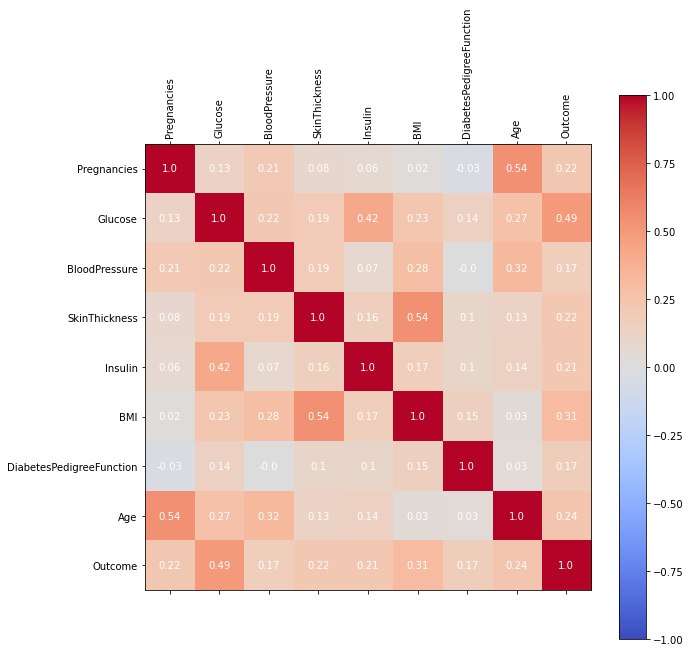

In [63]:
  #plotting the correlation between features using matplotlib 
  fig, ax = plt.subplots(figsize=(10, 10))
  cax     = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)  
  fig.colorbar(cax)  
  ticks = np.arange(0,len(df.columns),1)
  ax.set_xticks(ticks)  
  ax.set_xticklabels(df.columns)  
  plt.xticks(rotation = 90)
  ax.set_yticklabels(df.columns)  
  ax.set_yticks(ticks)  
  #---print the correlation factor---
  for i in range(df.shape[1]):  
      for j in range(9):
          text = ax.text(j, i, round(corr.iloc[i][j],2),  
                         ha="center", va="center", color="w")  
  plt.show()


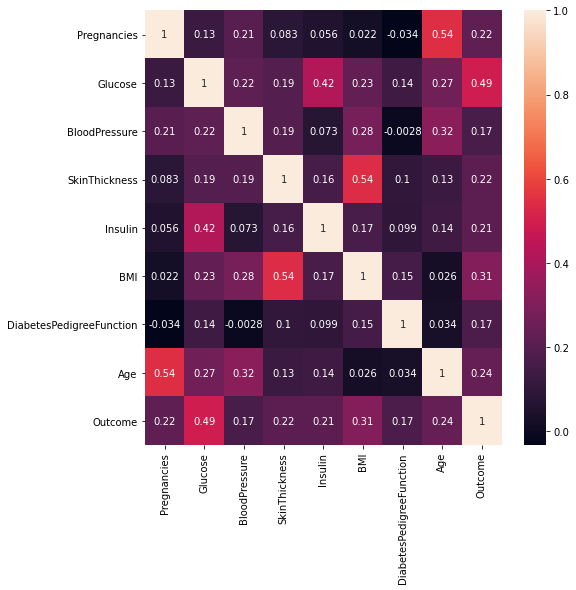

In [64]:
#using Seaborn's heatmap() function to plot the correlation matrix
import seaborn as sns 
sns.heatmap(df.corr(),annot=True)
#---get a reference to the current figure and set its size---
fig = plt.gcf()  
fig.set_size_inches(8,8)

In [65]:
 #---get the top four features that has the highest correlation---
print(df.corr().nlargest(4, 'Outcome').index)
 #---print the top 4 correlation values---  
print(df.corr().nlargest(4, 'Outcome').values[:,8])

Index(['Outcome', 'Glucose', 'BMI', 'Age'], dtype='object')
[1.         0.49292767 0.31192439 0.23835598]


In [66]:
#EVALUATING THE ALGORITHMS

In [67]:
#Option1, Logistic Regression
from sklearn import linear_model 
from sklearn.model_selection import cross_val_score
#---features--- 
X = df[['Glucose','BMI','Age']]
#---label---
y = df.iloc[:,8] 
log_regress = linear_model.LogisticRegression() 
log_regress_score = cross_val_score(log_regress, X, y, cv=10, scoring='accuracy').mean() 
print(log_regress_score)

0.7669856459330144


In [68]:
#save this result to a list so that we can use it to compare with the scores of other algorithms
result = []
result.append(log_regress_score)

In [69]:
#Option2, K-Nearest Neighbors (KNN) 
#also try out the various values of k to obtain the optimal k so that we can get the best accuracy
from sklearn.neighbors import KNeighborsClassifier
#---empty list that will hold cv (cross-validates) scores--- 
cv_scores = [] 
#---number of folds---
folds = 10
#---creating odd list of K for KNN---
ks = list(range(1,int(len(X) * ((folds - 1)/folds)), 2)) 
#---perform k-fold cross validation---
for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k) 
score = cross_val_score(knn, X, y, cv=folds, scoring='accuracy').mean() 
cv_scores.append(score) 
#---get the maximum score--- 
knn_score = max(cv_scores)
#---find the optimal k that gives the highest score--- 
optimal_k = ks[cv_scores.index(knn_score)]
print(f"The optimal number of neighbors is {optimal_k}")
print(knn_score)
result.append(knn_score)

The optimal number of neighbors is 1
0.6510594668489406


In [70]:
#Option3, support vector machines using linear kernel
from sklearn import svm
linear_svm = svm.SVC(kernel='linear')
linear_svm_score = cross_val_score(linear_svm, X, y, cv=10, scoring='accuracy').mean() 
print(linear_svm_score)
result.append(linear_svm_score) 

0.7656527682843473


In [71]:
#Option4, support vector machines using RBF kernel
rbf = svm.SVC(kernel='rbf') 
rbf_score = cross_val_score(rbf, X, y, cv=10, scoring='accuracy').mean() 
print(rbf_score) 
result.append(rbf_score)

0.765704032809296


In [72]:
#Selecting the Best Performing Algorithm 
algorithms = ["Logistic Regression", "K Nearest Neighbors", "SVM Linear Kernel", "SVM RBF Kernel"] 
cv_mean = pd.DataFrame(result,index = algorithms)
cv_mean.columns=["Accuracy"] 
cv_mean.sort_values(by="Accuracy",ascending=False)

,Accuracy
Logistic Regression,0.766986
SVM RBF Kernel,0.765704
SVM Linear Kernel,0.765653
K Nearest Neighbors,0.651059


In [73]:
#train model using entire data set with KNN option
knn = KNeighborsClassifier(n_neighbors=1) 
model5=knn.fit(X, y)

In [76]:
#Save to Final-Project-1 folder:
with open('Final-Project-1/diabetes.joblib', 'wb') as f:
    joblib.dump(model5, f)

In [75]:
#save the model to disk
import pickle
 #---save the model to disk--- 
filename = 'diabetes.sav'
 #---write to the file using write and binary mode---
pickle.dump(knn, open(filename, 'wb'))

In [22]:
 #---load the model from disk--- 
loaded_model = pickle.load(open(filename, 'rb'))

In [23]:
# let us do some predictions
Glucose = 65
BMI = 70
Age = 50

In [24]:
prediction = loaded_model.predict([[Glucose, BMI, Age]]) 
print(prediction) 
if (prediction[0]==0):
    print("Non-diabetic")
else: 
    print("Diabetic")

[0]
Non-diabetic


In [25]:
#get the probabilities and convert them into percentages
proba = loaded_model.predict_proba([[Glucose, BMI, Age]]) 
print(proba)
print("Confidence: " + str(round(np.amax(proba[0]) * 100 ,2)) + "%")

[[1. 0.]]
Confidence: 100.0%


In [26]:
#import libraries again
from sklearn.linear_model import LogisticRegression

In [27]:
#Build Logistic Regression
logModel=LogisticRegression()
logModel.fit(X,y)

LogisticRegression()

In [28]:
#Check Accuracy
print(f'Accuracy - : {logModel.score(X,y)}') 

Accuracy - : 0.76953125


In [29]:
import json
import requests